In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_widths

In [2]:
data = pd.read_csv("./cystometry/mouse1_091423_Chamber_1.csv", skiprows=4)
x = data["Time"].values
y = data["Pressure"].values
display(data)

,Time,Motion,Scale,Vol,Vol.1,Pressure
0,0.25,1,896.344,0.0,0.0,12.5
1,0.50,0,896.344,0.1,0.1,12.6
2,0.75,0,896.344,0.1,0.1,12.8
3,1.00,0,896.344,0.1,0.1,13.1
4,1.25,0,896.344,0.1,0.1,13.3
...,...,...,...,...,...,...
30907,7727.00,0,-0.003,770.4,770.4,7.2
30908,7727.25,0,-0.002,770.4,770.4,7.2
30909,7727.50,0,-0.002,770.5,770.5,7.2
30910,7727.75,0,-0.002,770.5,770.5,7.2


# Peak finding and Mean of the widths of identified peaks

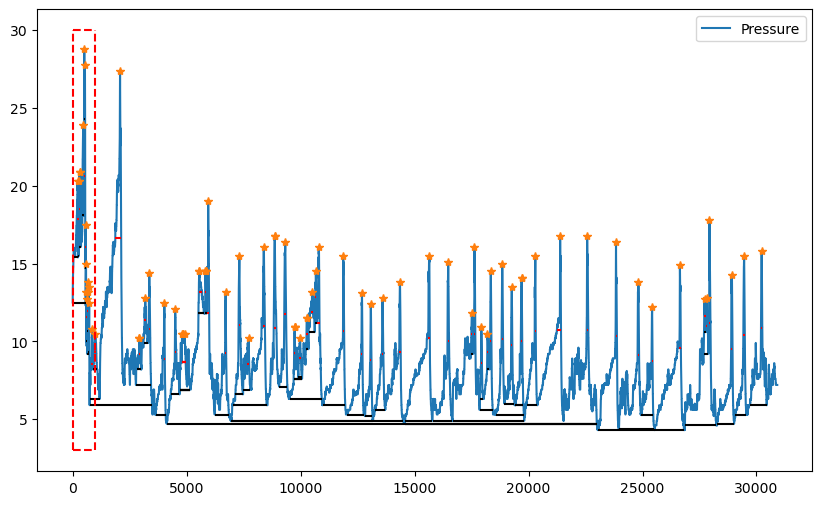

<Figure size 1000x600 with 0 Axes>

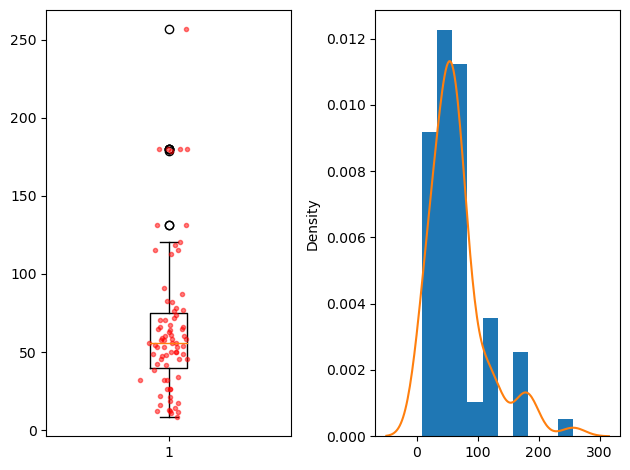

Mean Time is 66.01


In [11]:
#p_peaks, p_props = find_peaks(data["Pressure"], prominence=(2,20))
peaks, props = find_peaks(y, height=10, prominence=(2,None))
#print(props["prominences"].max())
results_half = peak_widths(y, peaks, rel_height=0.5)
results_full = peak_widths(y, peaks, rel_height=1)
#peak_pos = x[peaks]
#peak_heights = props["peak_heights"]
plt.figure(figsize=(10,6))
plt.plot(y)
plt.plot(peaks, y[peaks], "*", color='C1')
plt.hlines(*results_half[1:], color="red")
plt.hlines(*results_full[1:], color="k")
plt.vlines(1000, 3,30,  "r", linestyle="dashed")
plt.vlines(3, 3,30, "r", linestyle="dashed")
plt.hlines(30, 3,1000, "r", linestyle="dashed")
plt.hlines(3, 3,1000, "r", linestyle="dashed")
#plt.scatter(min_peak_pos, min_peak_heights, "D")
plt.legend(["Pressure"])
plt.show()

import matplotlib.mlab as mlab
import seaborn as sns
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.grid(False)
ax[0].boxplot(results_half[0])
rand_x = np.random.normal(1, 0.04, size=len(results_half[0]))
ax[0].plot(rand_x, results_half[0], 'r.', alpha=0.5)

# histogram
ax[1].hist(results_half[0], density=True)
sns.kdeplot(data=results_half[0], ax=ax[1])
plt.tight_layout()
plt.show()

def get_mean_peak_width(peak_widths):
    mean_peak_width = np.round(np.mean(peak_widths), 2)
    print(f"Mean Time is {mean_peak_width}")
    #return mean_peak_width

get_mean_peak_width(results_half[0])

# Showing only upto 1000 time points for clarity

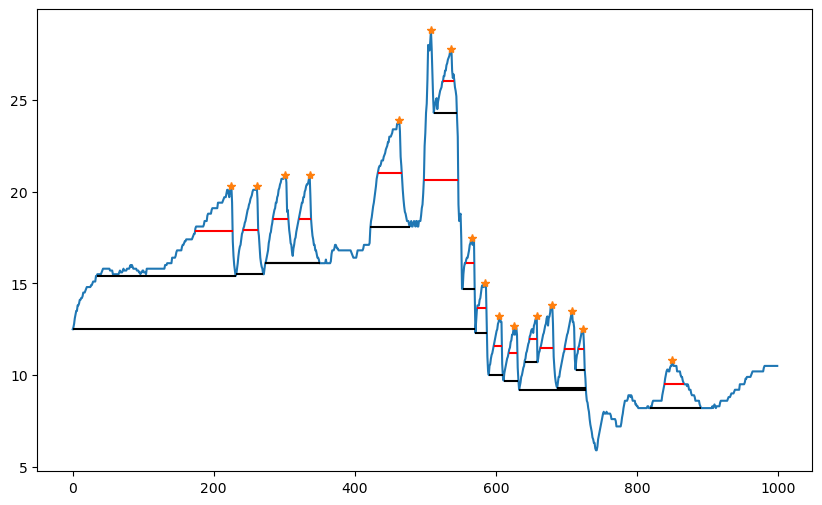

<Figure size 1000x600 with 0 Axes>

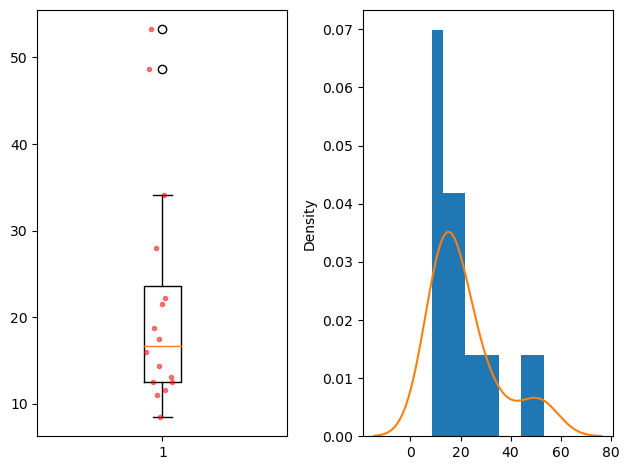

Mean Time is 21.46


In [12]:
slice_y = y[:1000]
peaks, props = find_peaks(slice_y, height=10, prominence=2)
results_half = peak_widths(slice_y, peaks, rel_height=0.5)
results_full = peak_widths(slice_y, peaks, rel_height=1)

plt.figure(figsize=(10,6))
plt.plot(slice_y)
plt.plot(peaks, y[peaks], "*", color="C1")
plt.hlines(*results_half[1:], color="r")
plt.hlines(*results_full[1:], color="k")
#plt.scatter(min_peak_pos, min_peak_heights, "D")

#plt.hlines(results_half[1][0], results_half[2][0],results_half[3][0], color="r", linewidth=5)
plt.show()

import matplotlib.mlab as mlab
import seaborn as sns
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.grid(False)
ax[0].boxplot(results_half[0])
rand_x = np.random.normal(1, 0.04, size=len(results_half[0]))
ax[0].plot(rand_x, results_half[0], 'r.', alpha=0.5)

# histogram
ax[1].hist(results_half[0], density=True)
sns.kdeplot(data=results_half[0], ax=ax[1])
plt.tight_layout()
plt.show()

def get_mean_peak_width(peak_widths):
    mean_peak_width = np.round(np.mean(peak_widths), 2)
    print(f"Mean Time is {mean_peak_width}")
    #return mean_peak_width

get_mean_peak_width(results_half[0]/)

In [6]:
# maximas = [p_peaks,h_peaks]
# labels= ["prominence", "height"]
# #Plotting
# def plot_cystometry_signals(data, height=None, prominence=None):
    
#     fig = plt.figure(10,5)
#     axs = fig.subplots(1,2)
#     for label, peaks, ax in zip(labels, maximas, axs.ravel()):
#         ax.plot(data["Time"],data["Pressure"])
#         ax.scatter(data["Time"][peaks], data["Pressure"][peaks], color = 'r', s = 15, 
#                             marker = 'D', label = label)
#         ax.legend()
#         ax.grid()
#     plt.show()
    
# plot_cystometry_signals(data)    

# plt.figure(figsize=(10,6))
# plt.plot(data["Time"],data["Pressure"]); plt.legend(['prominence'])
# plt.plot(data["Time"][peaks], data["Pressure"][peaks], "xr")
# plt.show()
# plt.plot(data["Time"][:1000],data["Pressure"][:1000])


# plt.plot(data["Time"][34:231],data["Pressure"][34:231])
# plt.plot(data["Time"][232:270],data["Pressure"][232:270])
# plt.plot(data["Time"][273:350],data["Pressure"][273:350])

# widths = peak_widths(data["Pressure"], peaks, rel_height=1, prominence_data=None, wlen=None)
# print(widths)

In [7]:
# peaks, props = find_peaks(data["Pressure"], distance=20)
# plt.figure(figsize=(10,6))
# plt.plot(data["Time"],data["Pressure"]); plt.legend(['distance'])
# plt.plot(data["Time"][peaks], data["Pressure"][peaks], "xr")
# plt.show()